<a href="https://colab.research.google.com/github/VishalDalwadi/027_VishalDalwadi/blob/main/Lab5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def generate_dataset():
 x_batch = np.linspace(0, 2, 100)
 y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
 return x_batch, y_batch

In [3]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
		
    y_pred = tf.add(tf.multiply(w, x), b)

    loss = tf.reduce_mean(tf.square(y_pred - y))

  return x, y, y_pred, loss

In [4]:
def run():
  x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}
		
    for i in range(30):
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))

    print('Predicting')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 2)
  plt.ylim(0, 2)
  plt.savefig('plot.png')

0 loss: 0.26084068
1 loss: 0.13513961
2 loss: 0.09392608
3 loss: 0.07958701
4 loss: 0.0738479
5 loss: 0.07090898
6 loss: 0.06892661
7 loss: 0.06731197
8 loss: 0.0658744
9 loss: 0.064549685
10 loss: 0.06331405
11 loss: 0.062156644
12 loss: 0.061070975
13 loss: 0.060052138
14 loss: 0.05909581
15 loss: 0.058198143
16 loss: 0.057355504
17 loss: 0.056564536
18 loss: 0.05582206
19 loss: 0.055125087
20 loss: 0.05447084
21 loss: 0.053856708
22 loss: 0.053280212
23 loss: 0.052739073
24 loss: 0.052231107
25 loss: 0.05175427
26 loss: 0.051306657
27 loss: 0.050886508
28 loss: 0.0504921
29 loss: 0.05012188
Predicting


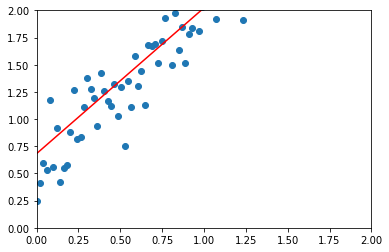

In [5]:
run()